In [1]:
import warnings
import pandas as pd
import sys
import os
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path+"\\python")
from utilities import *
from preprocessing import *

# hide warnings
warnings.filterwarnings("ignore")

# show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

"""
word_cloud_mask: creates a word cloud from a dataframe column
                 with image mask
                        
arguments:
    dataframe:   pandas dataframe
    column_name: string
    title:       string
    max_words:   int
"""
def word_cloud_mask(dataframe, column_name, mask, title = None, save_word_cloud = False):
    my_mask = np.array(Image.open(mask))
    concatenate_all_columns = " ".join(dataframe[column_name])
    wordcloud = WordCloud(background_color = "white", max_words = 1000,
                          max_font_size = 40, scale = 3, random_state = 0,
                          mask = my_mask)
    wordcloud.generate(concatenate_all_columns)
    plt.figure(1, figsize=(20,20))
    if title is not None:
        plt.title(title, fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # save word cloud plot as png
    if (save_word_cloud is True) and (title is not None):
        wordcloud.to_file(f"{word_cloud_directory}/{title.lower()}.png")

#### Load data sets

In [3]:
# columns that we need from listings.csv
listings_columns = ["id", "transit", "neighbourhood", "description", "last_review"]
# load the listrings data set
listings = pd.read_csv("../data_sets/listings.csv", usecols = listings_columns)

# columns that we need from reviews.csv
reviews_columns = ["listing_id", "date", "comments"]
# load the listrings data set
reviews = pd.read_csv("../data_sets/reviews.csv", usecols = reviews_columns)

#### Drop all rows that have any nan value

In [4]:
from IPython.display import display

# display data sets
display(listings.shape, listings.head(5))
display(reviews.shape, reviews.head(5))

# drop rows
listings = listings.dropna()
reviews = reviews.dropna()

# display data sets
display(listings.shape, listings.head(5))
display(reviews.shape,  reviews.head(5))

(11393, 5)

,id,description,transit,neighbourhood,last_review
0,10595,Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-03-15
1,10990,Athens Quality Apartments - Deluxe apartment i...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-01-08
2,10993,The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-01-17
3,10995,AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-02-23
4,27262,Big 1-bedroom apartment that can accommodate 4...,NaN,Ambelokipi,2020-01-08


(404345, 3)

,listing_id,date,comments
0,10595,2011-05-20,"The apartment was wonderful, fully equiped, be..."
1,10595,2012-08-15,Emmanouil was an excellent host. He provided u...
2,10595,2013-05-20,"Manos is a very good host, he is kind and help..."
3,10595,2014-05-04,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,2014-09-13,Fantastic accommodation very well located to v...


(6751, 5)

,id,description,transit,neighbourhood,last_review
0,10595,Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-03-15
1,10990,Athens Quality Apartments - Deluxe apartment i...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-01-08
2,10993,The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-01-17
3,10995,AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-02-23
5,28186,TOP 5 REASONS to stay here ⭐️Don't waste your ...,Great transportation links. Three metro statio...,Plaka,2020-03-09


(404096, 3)

,listing_id,date,comments
0,10595,2011-05-20,"The apartment was wonderful, fully equiped, be..."
1,10595,2012-08-15,Emmanouil was an excellent host. He provided u...
2,10595,2013-05-20,"Manos is a very good host, he is kind and help..."
3,10595,2014-05-04,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,2014-09-13,Fantastic accommodation very well located to v...


#### Merge data sets

In [5]:
# extract listing_id and last_review data from listings dataframe
listing_id_and_last_review = listings[["id", "last_review"]]
# rename column names so they can match with review dataframe
listing_id_and_last_review.columns = ["listing_id", "date"]
# merge listing set and review set
review_merge = pd.merge(listing_id_and_last_review,reviews, on=["listing_id", "date"])
# drop duplicate and hold last review
review_merge.drop_duplicates(subset = ["listing_id", "date"], keep = "last", inplace = True)

display(review_merge.shape, review_merge.head(5))

(6744, 3)

,listing_id,date,comments
0,10595,2020-03-15,Εξαιρετικά όλα!!!
1,10990,2020-01-08,The apartment is very clean and well equipped ...
2,10993,2020-01-17,"很不错,干净卫生,位置好!"
3,10995,2020-02-23,The apartment is as described. Emmanouil’s is ...
4,28186,2020-03-09,Tout ce fait à pieds visite des principaux si...


#### Preprocessing

In [6]:
# include more stop words for better results
more_stop_words = ["και","one","athens","house","one","fully","located","area"]

start_time = timer()

# clean our data
listings     = clean_stem_lemmatize_tokens_column(listings    , "neighbourhood", more_stop_words, True)
listings     = clean_stem_lemmatize_tokens_column(listings    , "transit"      , more_stop_words, True)
listings     = clean_stem_lemmatize_tokens_column(listings    , "description"  , more_stop_words, True)
review_merge = clean_stem_lemmatize_tokens_column(review_merge, "comments"     , more_stop_words, True)

display(listings.shape,     listings.head(5))
display(review_merge.shape, review_merge.head(5))

timer(start_time)

(6751, 11)

,id,description,transit,neighbourhood,last_review,neighbourhood_clean_stems_lemmas,neighbourhood_clean_stems_lemmas_tokens,transit_clean_stems_lemmas,transit_clean_stems_lemmas_tokens,description_clean_stems_lemmas,description_clean_stems_lemmas_tokens
0,10595,Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-03-15,ambelokipi,[ambelokipi],note day ticket public transport citi cost min...,"[note, day, ticket, public, transport, citi, c...",furnish apart bedroom apart bathroom excel clo...,"[furnish, apart, bedroom, apart, bathroom, exc..."
1,10990,Athens Quality Apartments - Deluxe apartment i...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-01-08,ambelokipi,[ambelokipi],note day ticket public transport citi cost min...,"[note, day, ticket, public, transport, citi, c...",qualiti apart delux apart bedroom apart squar ...,"[qualiti, apart, delux, apart, bedroom, apart,..."
2,10993,The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-01-17,ambelokipi,[ambelokipi],note day ticket public transport citi cost min...,"[note, day, ticket, public, transport, citi, c...",studio excel close metro station love clean sq...,"[studio, excel, close, metro, station, love, c..."
3,10995,AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,Ambelokipi,2020-02-23,ambelokipi,[ambelokipi],note day ticket public transport citi cost min...,"[note, day, ticket, public, transport, citi, c...",aqa bedroom apart excel close metro station lo...,"[aqa, bedroom, apart, excel, close, metro, sta..."
5,28186,TOP 5 REASONS to stay here ⭐️Don't waste your ...,Great transportation links. Three metro statio...,Plaka,2020-03-09,plaka,[plaka],great transport link three metro station aroun...,"[great, transport, link, three, metro, station...",top reason stay dont wast preciou time commut ...,"[top, reason, stay, dont, wast, preciou, time,..."


(6744, 5)

,listing_id,date,comments,comments_clean_stems_lemmas,comments_clean_stems_lemmas_tokens
0,10595,2020-03-15,Εξαιρετικά όλα!!!,,[]
1,10990,2020-01-08,The apartment is very clean and well equipped ...,apart clean well equip everyth may need locat ...,"[apart, clean, well, equip, everyth, may, need..."
2,10993,2020-01-17,"很不错,干净卫生,位置好!",,[]
3,10995,2020-02-23,The apartment is as described. Emmanouil’s is ...,apart describ emmanouil attent host avail need...,"[apart, describ, emmanouil, attent, host, avai..."
4,28186,2020-03-09,Tout ce fait à pieds visite des principaux si...,tout ce fait pie visit de principaux site et p...,"[tout, ce, fait, pie, visit, de, principaux, s..."


Time spent: 0:2:2


#### Create word clouds

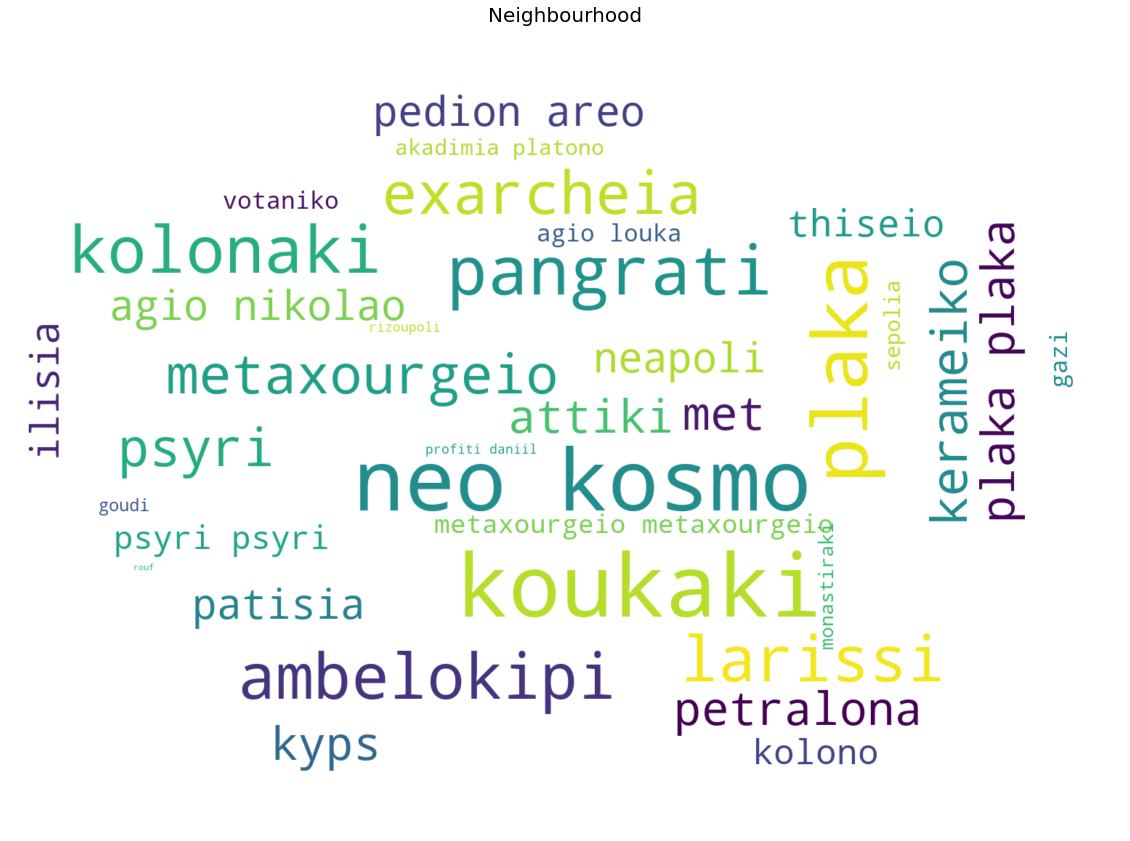

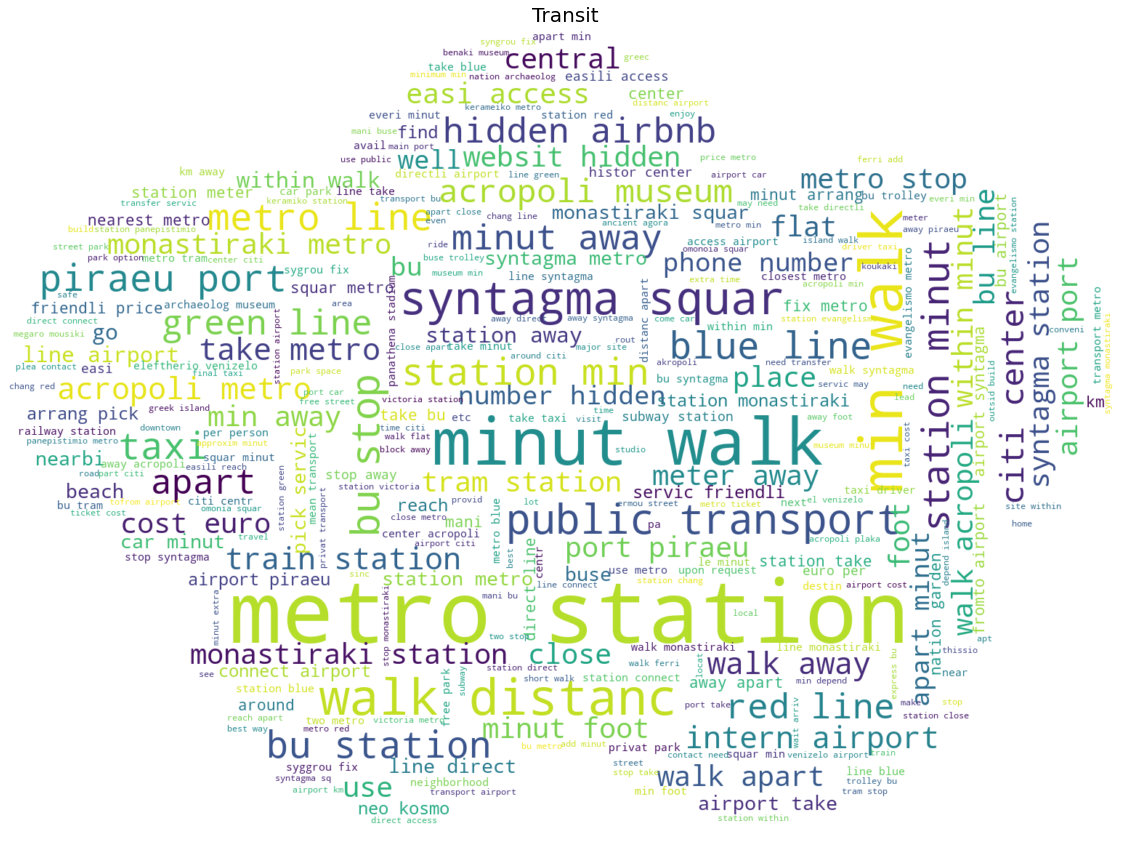

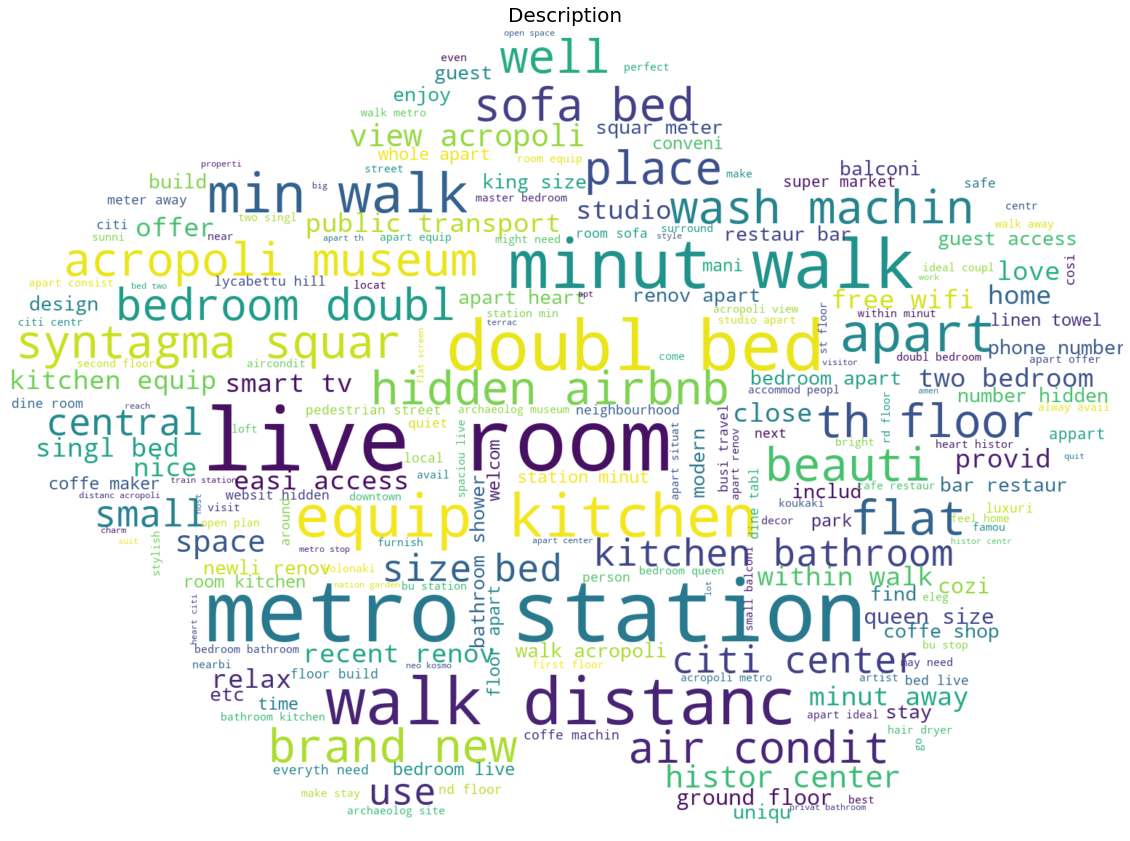

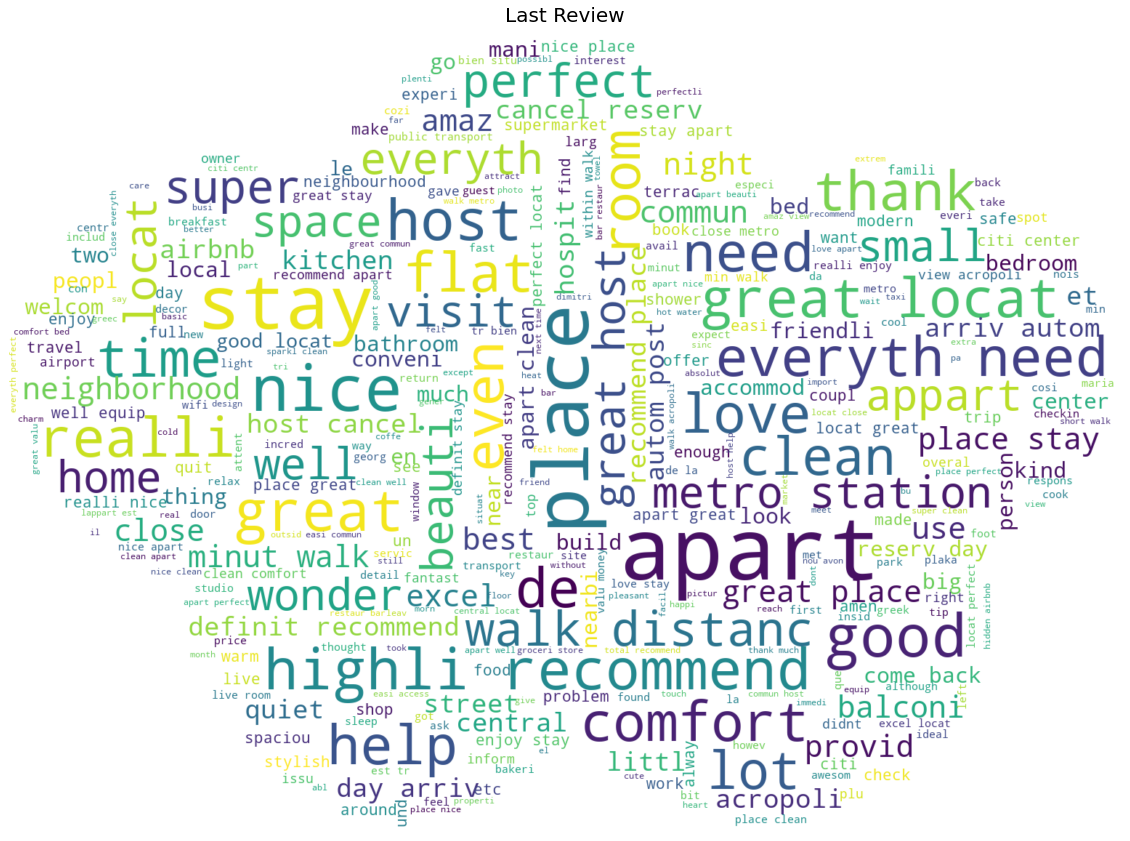

Time spent: 0:0:11


In [7]:
# create word cloud directory to save our word clouds
word_cloud_directory = "../word_clouds"
create_directory(word_cloud_directory)

start_time = timer()

image_mask = "../word_cloud_masks/cloud.png"

# create word clouds
word_cloud_mask(listings    , "neighbourhood_clean_stems_lemmas", image_mask, "Neighbourhood", True)
word_cloud_mask(listings    , "transit_clean_stems_lemmas"      , image_mask, "Transit"      , True)
word_cloud_mask(listings    , "description_clean_stems_lemmas"  , image_mask, "Description"  , True)
word_cloud_mask(review_merge, "comments_clean_stems_lemmas"     , image_mask, "Last Review"  , True)

timer(start_time)